In [92]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets

In [93]:
data = pd.read_csv('newMainData.csv')

In [94]:
data = data.drop('genres', axis = 1)

In [95]:
data.shape

(6955, 20)

In [96]:
data.head()

,title,original_title,budget,revenue,profit,success,belongs_to_collection,count_language,runtime,genre,genre_encode,release_date,director,actors,actorAwardNominations,actorAwardWins,actorMovies,directorAwardNominations,directorAwardWins,directorMovies
0,Toy Story,Toy Story,30000000,373554033.0,343554033.0,1,1,1,81.0,Animation,2,1995-10-30,John Lasseter,Tom Hanks,152,84,88,33,37,19
1,Jumanji,Jumanji,65000000,262797249.0,197797249.0,1,0,2,104.0,Adventure,1,1995-12-15,Joe Johnston,Robin Williams,86,64,108,7,2,15
2,Waiting to Exhale,Waiting to Exhale,16000000,81452156.0,65452156.0,1,0,1,127.0,Comedy,3,1995-12-22,Forest Whitaker,Whitney Houston,43,18,50,56,56,6
3,Heat,Heat,60000000,187436818.0,127436818.0,1,0,2,170.0,Action,0,1995-12-15,Michael Mann,Al Pacino,71,46,59,36,21,22
4,Sudden Death,Sudden Death,35000000,64350171.0,29350171.0,1,0,1,106.0,Action,0,1995-12-22,Peter Hyams,Jean-Claude Van Damme,9,2,71,7,1,24


In [97]:
month = []
for date in data['release_date']:
    try:
        split = date.split('-')
        month.append(split[1])
    except:
        print(date)
len(month)

6955

In [98]:
data['release_month'] = month
data = data.drop('release_date', axis = 1)

In [99]:
data.head()

,title,original_title,budget,revenue,profit,success,belongs_to_collection,count_language,runtime,genre,genre_encode,director,actors,actorAwardNominations,actorAwardWins,actorMovies,directorAwardNominations,directorAwardWins,directorMovies,release_month
0,Toy Story,Toy Story,30000000,373554033.0,343554033.0,1,1,1,81.0,Animation,2,John Lasseter,Tom Hanks,152,84,88,33,37,19,10
1,Jumanji,Jumanji,65000000,262797249.0,197797249.0,1,0,2,104.0,Adventure,1,Joe Johnston,Robin Williams,86,64,108,7,2,15,12
2,Waiting to Exhale,Waiting to Exhale,16000000,81452156.0,65452156.0,1,0,1,127.0,Comedy,3,Forest Whitaker,Whitney Houston,43,18,50,56,56,6,12
3,Heat,Heat,60000000,187436818.0,127436818.0,1,0,2,170.0,Action,0,Michael Mann,Al Pacino,71,46,59,36,21,22,12
4,Sudden Death,Sudden Death,35000000,64350171.0,29350171.0,1,0,1,106.0,Action,0,Peter Hyams,Jean-Claude Van Damme,9,2,71,7,1,24,12


In [100]:
data = data.dropna()

In [101]:
data.shape

(6819, 20)

## Basic Linear Regression

In [102]:
trainData, testData = train_test_split(data, test_size=0.30, random_state=42)

In [103]:
trainData.shape

(4773, 20)

In [104]:
testData.shape

(2046, 20)

In [105]:
features = trainData[['budget', 'belongs_to_collection', 'count_language', 'genre_encode', 'release_month', 'actorAwardNominations',
          'actorAwardWins', 'actorMovies', 'directorAwardNominations','directorAwardWins','directorMovies']].values

In [106]:
featuresTest = testData[['budget', 'belongs_to_collection', 'count_language', 'genre_encode', 'release_month', 'actorAwardNominations',
          'actorAwardWins', 'actorMovies', 'directorAwardNominations','directorAwardWins','directorMovies']].values

In [107]:
trainTarget = trainData['profit'].values
testTarget = testData['profit'].values

In [108]:
# Scale the data
featureScaler = MinMaxScaler()
targetScaler = MinMaxScaler()

In [109]:
featureScaler.fit(features)
scaledfeatures = featureScaler.transform(features)
scaledtestfeatures = featureScaler.transform(featuresTest)

/Users/school/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [110]:
targetScaler.fit(trainTarget.reshape(-1,1))
scaledTarget = targetScaler.transform(trainTarget.reshape(-1,1))
scaledTestTarget = targetScaler.transform(testTarget.reshape(-1,1))

In [111]:
linreg = LinearRegression(fit_intercept = False, normalize = False)
linreg.fit(scaledfeatures, scaledTarget)
predictions = linreg.predict(scaledtestfeatures)

In [163]:
rmse = mean_squared_error(scaledTestTarget, predictions)

In [164]:
print("RSME for Linear: " + str(rmse))

RSME for Linear: 1.0197519945820162e+16


In [131]:
targetScaler.inverse_transform(rmse)[0][0]

2.7703390466958485e+25

In [132]:
rss = sum((predictions-scaledTestTarget)**2)

In [133]:
rss

array([1.20963369e+18, 2.74002446e+17, 8.10676136e+18, ...,
       3.35429268e+17, 1.38806113e+19, 2.62327253e+15])

In [134]:
linreg.intercept_

-19542620.953352652

In [135]:
linreg.coef_

array([ 1.90631996e+00,  7.48990812e+07, -3.69292224e+06,  2.97787243e+05,
        8.64519877e+05,  1.47106431e+05, -1.59804404e+05, -7.06548981e+04,
       -7.17406040e+04,  4.77851511e+05, -6.15797127e+04])

In [136]:
linreg = LinearRegression(fit_intercept = True, normalize=True)
linreg.fit(features, trainTarget)
predictions = linreg.predict(featuresTest)

In [137]:
rss = sum((predictions-testTarget)**2)

In [138]:
rss

2.091159150697519e+19

In [139]:
## Use RMSE

In [140]:
linreg.intercept_

-19542620.953352652

In [141]:
linreg.coef_

array([ 1.90631996e+00,  7.48990812e+07, -3.69292224e+06,  2.97787243e+05,
        8.64519877e+05,  1.47106431e+05, -1.59804404e+05, -7.06548981e+04,
       -7.17406040e+04,  4.77851511e+05, -6.15797127e+04])

Text(0.5,1,'Plain Regression Model')

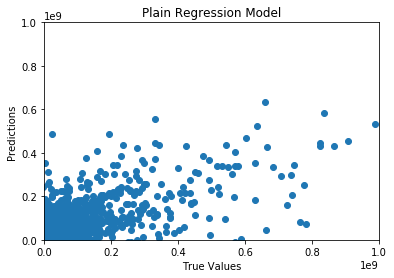

In [142]:
plt.scatter(testTarget, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.ylim(-100000,1000000000)
plt.xlim(-100000,1000000000)
plt.title("Plain Regression Model")

## Using ridge regression

In [143]:
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-6, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 50]


# .001 to 10 

In [144]:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,12)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,12)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

In [145]:
models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1:234, 5:235, 10:236}

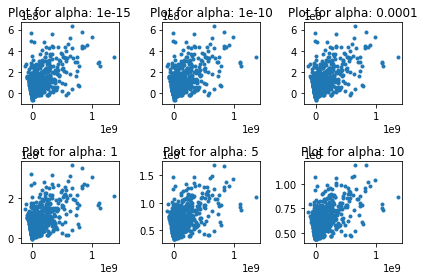

In [146]:
for i in range(0,12):
    ridgeReg = Ridge(alpha = alpha_ridge[i], fit_intercept = True, normalize = True)
    ridgeReg.fit(features, trainTarget)
    predictions = ridgeReg.predict(featuresTest)
    rss = sum((predictions-testTarget)**2)
    
    
    
    # Sanity Check
    modelInfo = [rss]
    modelInfo.extend([ridgeReg.intercept_])
    modelInfo.extend(ridgeReg.coef_)
    coef_matrix_ridge.iloc[i,] = modelInfo
    
    if alpha_ridge[i] in models_to_plot:
        plt.subplot(models_to_plot[alpha_ridge[i]])
        plt.tight_layout()
        plt.plot(testTarget,predictions, '.')
        plt.title('Plot for alpha: %.3g'%alpha_ridge[i])

In [147]:
# plot against alpha vs training error(validation error)
# RMSE
# Use MinMaxScaler
# CROSS VALIDATE

In [148]:
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11
alpha_1e-15,2.09116e+19,-1.95426e+07,1.90632,7.48991e+07,-3.69292e+06,297787,864520,147106,-159804,-70654.9,-71740.6,477852,-61579.7
alpha_1e-10,2.09116e+19,-1.95426e+07,1.90632,7.48991e+07,-3.69292e+06,297787,864520,147106,-159804,-70654.9,-71740.6,477852,-61579.7
alpha_1e-08,2.09116e+19,-1.95426e+07,1.90632,7.48991e+07,-3.69292e+06,297787,864520,147106,-159804,-70654.9,-71740.6,477851,-61579.7
alpha_1e-06,2.09116e+19,-1.95426e+07,1.90632,7.4899e+07,-3.69291e+06,297785,864519,147106,-159803,-70654.9,-71737.4,477847,-61579.5
alpha_0.0001,2.09114e+19,-1.95371e+07,1.90613,7.48959e+07,-3.6917e+06,297549,864462,147027,-159636,-70652.2,-71424.2,477415,-61561.4
alpha_0.001,2.09098e+19,-1.94874e+07,1.9044,7.48676e+07,-3.68075e+06,295403,863945,146319,-158134,-70627.6,-68617.7,473540,-61396.8
alpha_0.01,2.08947e+19,-1.89955e+07,1.88732,7.45789e+07,-3.57459e+06,274131,858773,140179,-144599,-70371.4,-44115.2,439424,-59774.3
alpha_1,2.30122e+19,1.03788e+07,0.968639,4.71007e+07,130571,-425134,525330,99496,52277.2,-38203.8,87801.9,137364,-2725.83
alpha_5,2.86225e+19,3.73015e+07,0.335828,1.77584e+07,615755,-280882,222821,53389.1,52707.1,-10419.9,45695.8,61412,5453.35
alpha_10,3.06047e+19,4.51997e+07,0.185594,9.93973e+06,424611,-171714,131620,32884.6,35131.6,-5137.93,28246.5,37283.9,3951.07


## Lasso Regression

In [158]:
alpha_lasso = [1, 10, 50, 500, 5000, 15000, 50000, 100000, 200000]

In [159]:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,12)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,9)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

In [165]:
models_to_plot = {1:231, 5000:232, 50000:233, 100000:234}


array([[25530000, 0, 1, ..., 3, 0, 8],
       [900000, 0, 1, ..., 7, 14, 74],
       [4000000, 1, 1, ..., 6, 3, 20],
       ...,
       [700000, 0, 1, ..., 0, 0, 4],
       [50000000, 0, 1, ..., 36, 20, 5],
       [10000000, 0, 1, ..., 7, 2, 22]], dtype=object)

RMSE: 1.0220715425708324e+16
RMSE: 1.022068137151927e+16
RMSE: 1.0220530594939916e+16
RMSE: 1.021889740219248e+16
RMSE: 1.020015310905429e+16
RMSE: 1.0173512005092736e+16
RMSE: 1.0140996454559992e+16
RMSE: 1.0180111771176982e+16
RMSE: 1.0374083388948368e+16


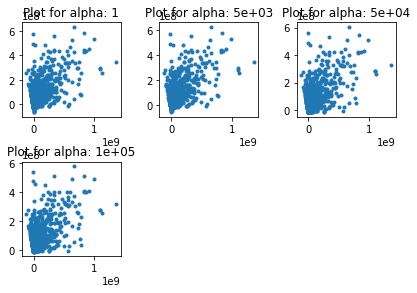

In [169]:
for i in range(0,9):
    lassoReg = Lasso(alpha = alpha_lasso[i], fit_intercept = True, normalize = True)
    lassoReg.fit(features, trainTarget)
    predictions = lassoReg.predict(featuresTest)
    rss = sum((predictions-testTarget)**2)
    
    trainRsme = mean_squared_error(testTarget , predictions)
    print("RMSE: " + str(trainRsme))
    
    modelInfo = [rss]
    modelInfo.extend([lassoReg.intercept_])
    modelInfo.extend(lassoReg.coef_)
    coef_matrix_lasso.iloc[i,] = modelInfo
    
    if alpha_lasso[i] in models_to_plot:
        plt.subplot(models_to_plot[alpha_lasso[i]])
        plt.tight_layout()
        plt.plot(testTarget,predictions, '.')
        plt.title('Plot for alpha: %.3g'%alpha_lasso[i])

In [153]:
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11
alpha_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_5e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_5e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_1.5e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_5e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_1e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_2e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Logistic Regression

In [461]:
scaledfeatures

array([[0.04210526, 0.        , 0.        , ..., 0.00675676, 0.01052632,
        0.08688784],
       [0.00157894, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06578947, 0.        , 0.        , ..., 0.0777027 , 0.05263158,
        0.00631912],
       ...,
       [0.06315789, 0.        , 0.        , ..., 0.56756757, 0.43684211,
        0.00473934],
       [0.0368421 , 0.        , 0.        , ..., 0.26351351, 0.27894737,
        0.12796209],
       [0.04710526, 1.        , 0.        , ..., 0.03716216, 0.01578947,
        0.09478673]])

In [462]:
logisticTarget = trainData['success'].values
logisticTargetTest = testData['success'].values

In [463]:
scaledfeatures.shape

(4773, 11)

In [464]:
logisticTarget

array([1, 0, 0, ..., 1, 0, 0])

In [465]:
parameters = {'kernel':('logistic'), 'C':[1,3,5,8,10]}
svc = svm.SVC(gamma="scale")
gs = GridSearchCV(svc, param_grid = parameters, cv=5)
gs.fit(scaledfeatures, logisticTarget)

ValueError: Parameter values for parameter (kernel) need to be a sequence(but not a string) or np.ndarray.

# RSMEs for Linear, Lasso, Ridge, and Logistic:

In [466]:
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV



In [467]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(1,10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [468]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [469]:
# Fit grid search
best_model = clf.fit(scaledfeatures, logisticTarget)

In [470]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])


Best Penalty: l1
Best C: 126.48552168552958


#  Linear Regression RSME: 

In [172]:
# Predict on train features. Get RMSE against train target
# Predict on test features. Get RMSE against test target

trainPredictions = best_model.predict(scaledfeatures)
testPredictions = best_model.predict(scaledtestfeatures)

trainRmse = mean_squared_error(logisticTarget , trainPredictions)
testRmse = mean_squared_error(logisticTargetTest , testPredictions)

# rmseTest = mean_squared_error(scaledtestfeatures, testPredictions)
# rmseTrain = mean_squared_error(scaledfeatures, trainPredictions)


print(trainRmse)
print(testRmse)

NameError: name 'best_model' is not defined

In [399]:
# logReg = LogisticRegression(fit_intercept=False, random_state=0)
# logReg = logReg.fit(scaledfeatures, logisticTarget)

# print(logReg.score(scaledfeatures, logisticTarget))

# logRegWTuning = LogisticRegression(fit_intercept=False, random_state=0,penalty='l1',C = 316.227)
# logRegWTuning = logReg.fit(scaledfeatures, logisticTarget)

# print(logRegWTuning.score(scaledfeatures, logisticTarget))

In [400]:
# predictions = logReg.predict(scaledtestfeatures)

In [318]:
# predictions.shape

(2046,)

In [398]:
## New score with Tuning (logisticTarget): 
logRegWTuning.score(scaledfeatures, logisticTarget)

scaled

0.6626859417557092

In [320]:
## New score with Tuning (logisticTargetTest): 
logRegWTuning.score(scaledtestfeatures, logisticTargetTest)

0.6617790811339198

In [306]:
## Old Score without HyperParameter Tuning
# When training rmse = test rmse, did not overfit
logReg.score(scaledfeatures, logisticTarget)

0.6626859417557092

In [415]:
logReg.score(scaledtestfeatures, logisticTargetTest)

# rmse = mean_squared_error(scaledTestTarget, predictions)


rmse = rmse(scaledTestTarget, predictions)

TypeError: 'numpy.float64' object is not callable

## KNN

In [28]:
trainTarget = trainData['success'].values
testTarget = testData['success'].values

In [40]:
col = ['KNN Parameter', 'accuracy']
ind = [i for i in range(0,8)]
knnResult = pd.DataFrame(index=ind, columns = col)

In [41]:
knnParameter = [1, 2, 3, 4, 5, 6, 7, 8]

In [42]:
for i in range(0, len(knnParameter)):
    knnModel = KNeighborsClassifier(n_neighbors = knnParameter[i])
    knnModel.fit(features, trainTarget)
    predictions = knnModel.predict(featuresTest)
    acc = accuracy_score(testTarget, predictions)
    rtrn = [knnParameter[i], acc]
    knnResult.iloc[i,] = rtrn

In [43]:
knnResult

,KNN Parameter,accuracy
0,1,0.59433
1,2,0.521505
2,3,0.599707
3,4,0.569404
4,5,0.621212
5,6,0.585533
6,7,0.611437
7,8,0.594819


In [44]:
## Code for regressor

In [63]:
for i in range(0,len(knnParameter)):
    knnModel = KNeighborsRegressor(n_neighbors=knnParameter[i])
    knnModel.fit(features,trainTarget)
    predictions = knnModel.predict(featuresTest)
    rss = sum((predictions-testTarget)**2)
    rtrn = [knnParameter[i], rss]
    knnResult.iloc[i,] = rtrn

In [64]:
knnResult

,KNN Parameter,rss
0,1,3.52548e+19
1,2,3.0569e+19
2,3,2.71667e+19
3,4,2.46886e+19
4,5,2.3316e+19
5,6,2.34615e+19
6,7,2.33137e+19
7,8,2.32762e+19
